1. 2018-06-23 10:06:00: 
    1. 系统报出齿轮箱过滤器压差高报警，上机组检查发现滤芯污染，清理过滤器内壁并更换滤芯，更换完毕后运行油泵，过滤器端盖处无漏油现象，启机后观察压差正常，机组恢复正常运行。
    2. 发电机厂家对发电机进行检查，经检查确认无异常。"
1. 2018-07-03: 
    1. 机组报齿轮箱油泵出口压力高故障，故障停机；
    2. 查阅齿轮箱进出口压力数据，油泵出口压力达14.1bar；
    3. 上机组检查滤芯发现有大量铁粉，打开齿轮箱观察孔，未见明显异常，更换滤芯；
    4. 机组运行两小时于2018.07.03  14：04报齿轮箱 入口压力低故障；
    5. 上机组检查发现齿轮箱二级大后轴承端盖破损，轴承滚珠掉落；
    6. 联系重齿厂家后，确认需更换主齿轮箱。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
# speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "29"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
# speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (159, 75)


In [5]:
# speed.hist(bins=128)

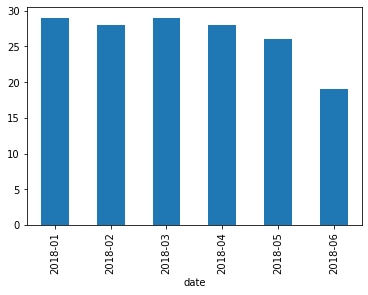

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-04"
train_end = "2018-05"

test_start = "2018-06"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (54, 75)
feature_test.shape: (19, 75)


In [8]:
feature_test = feature["2018-04": ]
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

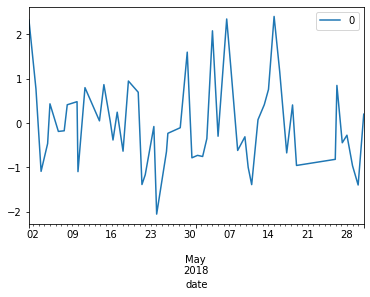

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

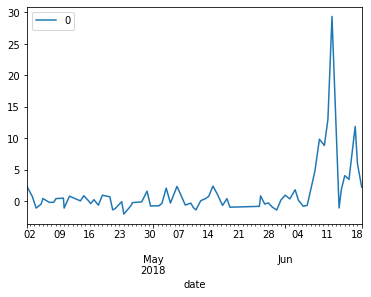

In [13]:
anomaly_scores.plot()

In [14]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,
2018-06-08 00:00,4.879093
2018-06-09 01:00,9.845585
2018-06-10 05:00,8.847751
2018-06-11 01:00,12.992079
2018-06-12 00:00,29.358550
2018-06-15 00:00,4.059685
2018-06-17 11:00,11.876445
2018-06-18 00:00,5.918393
